In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/03_Mar.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,17.000000,75.000000,1,4,1,1844.0,1891.0,1964.0,1719.0,1540.0,1670.0,1856.416667,1713.0
1,16.916667,74.583333,1,4,1,1787.0,1879.0,1933.0,1679.0,1533.0,1680.0,1834.916667,1675.0
2,16.833333,74.166667,1,4,1,1789.0,1919.0,1950.0,1665.0,1520.0,1664.0,1812.083333,1676.0
3,16.750000,73.750000,1,4,1,1754.0,1885.0,1933.0,1645.0,1500.0,1636.0,1785.333333,1612.0
4,16.666667,73.333333,2,4,1,1713.0,1844.0,1891.0,1614.0,1482.0,1591.0,1763.000000,1623.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,20.532452,58.908200,23,1,0,2076.0,2081.0,2215.0,2300.0,2348.0,2270.0,2085.833333,2094.0
8924,20.532452,58.908200,24,1,0,2064.0,1914.0,2200.0,2274.0,2325.0,2273.0,2075.333333,2074.0
8925,20.532452,58.908200,24,1,0,2099.0,1985.0,2186.0,2248.0,2289.0,2244.0,2064.000000,2050.0
8926,20.200000,58.908200,24,1,0,2119.0,2039.0,2173.0,2205.0,2224.0,2192.0,2050.083333,2006.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   int64  
 3   B       8928 non-null   int64  
 4   C       8928 non-null   int64  
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 906.9 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   float64
 3   B       8928 non-null   float64
 4   C       8928 non-null   float64
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(13)
memory usage: 906.9 KB


In [6]:
train = stlf_data.copy()[stlf_data.index <= 4992][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-0.938371,-1.032032,1.169603,-1.660699,-0.029455,0.606894,-0.445705,-0.268448,0.006405,-0.914839,-1.568511,-1.004322,-0.418586
1,-1.080876,-1.047602,1.143068,-1.660699,-0.029455,0.606894,-0.659779,-0.313547,-0.110176,-1.069250,-1.595809,-0.964664,-0.503302
2,-1.077126,-1.063172,1.116533,-1.660699,-0.029455,0.606894,-0.652268,-0.163218,-0.046245,-1.123294,-1.646506,-1.028118,-0.593272
3,-1.317136,-1.078742,1.089998,-1.660699,-0.029455,0.606894,-0.783717,-0.290998,-0.110176,-1.200499,-1.724501,-1.139162,-0.698675
4,-1.275884,-1.094311,1.063463,-1.516262,-0.029455,0.606894,-0.937701,-0.445085,-0.268124,-1.320168,-1.794696,-1.317626,-0.786675


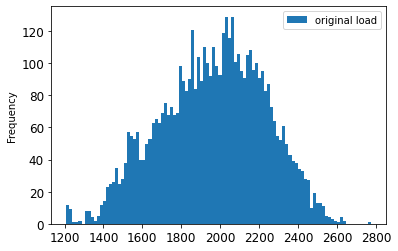

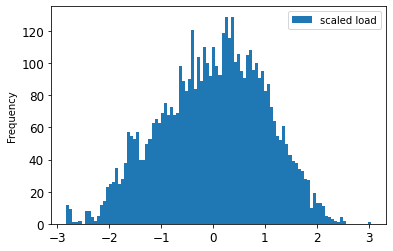

In [8]:
stlf_data[stlf_data.index <= 4992][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 4992][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

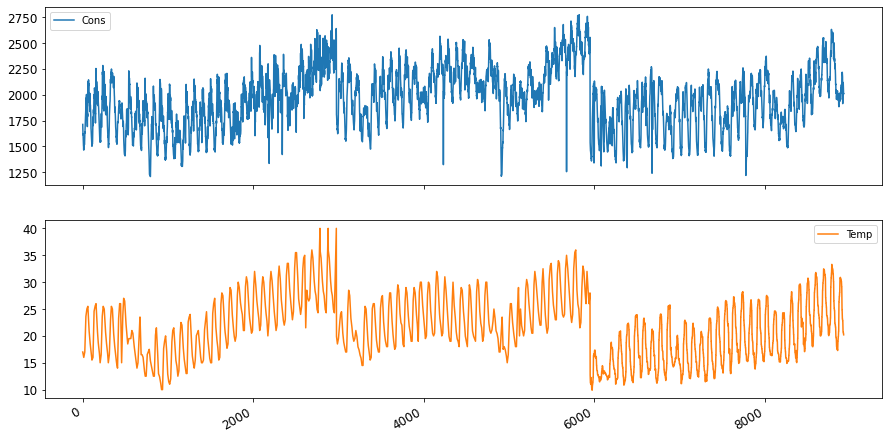

In [9]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [10]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+1'] = train_shifted['Cons'].shift(-1)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
0,-0.938371,-1.032032,1.169603,-1.660699,-0.029455,0.606894,-0.445705,-0.268448,0.006405,-0.914839,-1.568511,-1.004322,-0.418586,-1.080876
1,-1.080876,-1.047602,1.143068,-1.660699,-0.029455,0.606894,-0.659779,-0.313547,-0.110176,-1.069250,-1.595809,-0.964664,-0.503302,-1.077126
2,-1.077126,-1.063172,1.116533,-1.660699,-0.029455,0.606894,-0.652268,-0.163218,-0.046245,-1.123294,-1.646506,-1.028118,-0.593272,-1.317136
3,-1.317136,-1.078742,1.089998,-1.660699,-0.029455,0.606894,-0.783717,-0.290998,-0.110176,-1.200499,-1.724501,-1.139162,-0.698675,-1.275884
4,-1.275884,-1.094311,1.063463,-1.516262,-0.029455,0.606894,-0.937701,-0.445085,-0.268124,-1.320168,-1.794696,-1.317626,-0.786675,-1.392138
5,-1.392138,-1.109881,1.036928,-1.516262,-0.029455,0.606894,-1.080417,-0.659305,-0.313253,-1.435976,-1.888290,-1.452466,-0.880914,-1.504643
6,-1.504643,-1.125451,1.010393,-1.516262,-0.029455,0.606894,-1.076661,-0.651789,-0.162826,-1.505461,-1.997483,-1.603169,-0.998138,-1.613397
7,-1.613397,-1.141021,0.983858,-1.516262,-0.029455,0.606894,-1.317026,-0.783327,-0.290689,-1.582666,-2.032581,-1.571442,-1.113720,-1.718401
8,-1.718401,-1.156590,0.957323,-1.371824,-0.029455,0.606894,-1.275713,-0.937415,-0.444876,-1.563365,-2.083278,-1.575408,-1.225033,-1.722151
9,-1.722151,-1.172160,0.930788,-1.371824,-0.029455,0.606894,-1.392140,-1.080228,-0.659235,-1.625129,-2.114476,-1.559544,-1.317958,-1.733402


In [11]:
# For debugging why val_loss gives NaN
train_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4983,-0.552106,-1.329273,1.586444,1.372490,-0.029455,0.606894,-0.149005,0.047244,0.292216,0.027067,1.020925,0.137848,-0.111243,-0.600858
4984,-0.600858,-1.303796,1.534338,1.516927,-0.029455,0.606894,-0.246653,0.058518,0.423840,-0.077161,0.927331,0.217166,-0.200556,-0.499604
4985,-0.499604,-1.278318,1.482233,1.516927,-0.029455,0.606894,-0.396881,-0.114361,0.356147,0.027067,1.087221,0.435289,-0.275093,-0.315846
4986,-0.315846,-1.252840,1.430128,1.516927,-0.029455,0.606894,-0.524574,-0.155701,-0.012399,0.301146,1.293908,0.510640,-0.301362,-0.248344
4987,-0.248344,-1.227362,1.378023,1.516927,-0.029455,0.606894,-0.550864,-0.148185,0.047772,0.355190,1.266610,0.467016,-0.326974,-0.270845
4988,-0.270845,-1.201884,1.325918,1.661365,-0.029455,0.606894,-0.599688,-0.245899,0.059054,0.289565,1.137918,0.363903,-0.355541,-0.413350
4989,-0.413350,-1.176407,1.273813,1.661365,-0.029455,0.606894,-0.498285,-0.396228,-0.113937,0.096552,1.141818,0.514606,-0.381481,-0.218343
4990,-0.218343,-1.150929,1.221708,1.661365,-0.029455,0.606894,-0.314256,-0.524008,-0.155304,0.254823,1.531793,0.835842,-0.386735,-0.240843
4991,-0.240843,-1.125451,1.169603,1.661365,-0.029455,0.606894,-0.246653,-0.550316,-0.147783,0.084971,1.449898,0.760490,-0.394616,-0.312096
4992,-0.312096,-1.125451,1.169603,-1.660699,0.479435,0.606894,-0.269187,-0.599173,-0.245560,-0.073300,1.379703,0.657377,-0.400198,NaN


In [12]:
#One Nan value on 5699, filled with linear interpolation
train_shifted = train_shifted.interpolate()

In [13]:
train_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4983,-0.552106,-1.329273,1.586444,1.372490,-0.029455,0.606894,-0.149005,0.047244,0.292216,0.027067,1.020925,0.137848,-0.111243,-0.600858
4984,-0.600858,-1.303796,1.534338,1.516927,-0.029455,0.606894,-0.246653,0.058518,0.423840,-0.077161,0.927331,0.217166,-0.200556,-0.499604
4985,-0.499604,-1.278318,1.482233,1.516927,-0.029455,0.606894,-0.396881,-0.114361,0.356147,0.027067,1.087221,0.435289,-0.275093,-0.315846
4986,-0.315846,-1.252840,1.430128,1.516927,-0.029455,0.606894,-0.524574,-0.155701,-0.012399,0.301146,1.293908,0.510640,-0.301362,-0.248344
4987,-0.248344,-1.227362,1.378023,1.516927,-0.029455,0.606894,-0.550864,-0.148185,0.047772,0.355190,1.266610,0.467016,-0.326974,-0.270845
4988,-0.270845,-1.201884,1.325918,1.661365,-0.029455,0.606894,-0.599688,-0.245899,0.059054,0.289565,1.137918,0.363903,-0.355541,-0.413350
4989,-0.413350,-1.176407,1.273813,1.661365,-0.029455,0.606894,-0.498285,-0.396228,-0.113937,0.096552,1.141818,0.514606,-0.381481,-0.218343
4990,-0.218343,-1.150929,1.221708,1.661365,-0.029455,0.606894,-0.314256,-0.524008,-0.155304,0.254823,1.531793,0.835842,-0.386735,-0.240843
4991,-0.240843,-1.125451,1.169603,1.661365,-0.029455,0.606894,-0.246653,-0.550316,-0.147783,0.084971,1.449898,0.760490,-0.394616,-0.312096
4992,-0.312096,-1.125451,1.169603,-1.660699,0.479435,0.606894,-0.269187,-0.599173,-0.245560,-0.073300,1.379703,0.657377,-0.400198,-0.312096


In [14]:
y_train = train_shifted[['y_t+1']]
y_train


,y_t+1
0,-1.080876
1,-1.077126
2,-1.317136
3,-1.275884
4,-1.392138
...,...
4988,-0.413350
4989,-0.218343
4990,-0.240843
4991,-0.312096


In [15]:
X_train = train_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-0.938371,-1.032032,1.169603,-1.660699,-0.029455,0.606894,-0.445705,-0.268448,0.006405,-0.914839,-1.568511,-1.004322,-0.418586
1,-1.080876,-1.047602,1.143068,-1.660699,-0.029455,0.606894,-0.659779,-0.313547,-0.110176,-1.069250,-1.595809,-0.964664,-0.503302
2,-1.077126,-1.063172,1.116533,-1.660699,-0.029455,0.606894,-0.652268,-0.163218,-0.046245,-1.123294,-1.646506,-1.028118,-0.593272
3,-1.317136,-1.078742,1.089998,-1.660699,-0.029455,0.606894,-0.783717,-0.290998,-0.110176,-1.200499,-1.724501,-1.139162,-0.698675
4,-1.275884,-1.094311,1.063463,-1.516262,-0.029455,0.606894,-0.937701,-0.445085,-0.268124,-1.320168,-1.794696,-1.317626,-0.786675
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,-0.270845,-1.201884,1.325918,1.661365,-0.029455,0.606894,-0.599688,-0.245899,0.059054,0.289565,1.137918,0.363903,-0.355541
4989,-0.413350,-1.176407,1.273813,1.661365,-0.029455,0.606894,-0.498285,-0.396228,-0.113937,0.096552,1.141818,0.514606,-0.381481
4990,-0.218343,-1.150929,1.221708,1.661365,-0.029455,0.606894,-0.314256,-0.524008,-0.155304,0.254823,1.531793,0.835842,-0.386735
4991,-0.240843,-1.125451,1.169603,1.661365,-0.029455,0.606894,-0.246653,-0.550316,-0.147783,0.084971,1.449898,0.760490,-0.394616


In [16]:
X_train=np.atleast_3d(X_train)
X_train.shape

(4993, 13, 1)

In [17]:
valid = stlf_data.copy()[(stlf_data.index >=4993) & (stlf_data.index <=5953)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4993,1850.0,17.000000,73.000000,1.0,5.0,1.0,1853.0,1830.0,1857.0,1892.0,2238.0,2070.0,1860.500000
4994,1826.0,17.500000,71.000000,1.0,5.0,1.0,1905.0,1879.0,1823.0,1861.0,2235.0,2037.0,1860.750000
4995,1818.0,18.000000,69.000000,1.0,5.0,1.0,1899.0,1897.0,1816.0,1833.0,2212.0,2051.0,1860.916667
4996,1797.0,18.500000,67.000000,2.0,5.0,1.0,1880.0,1891.0,1803.0,1813.0,2195.0,2037.0,1860.416667
4997,1779.0,19.000000,65.000000,2.0,5.0,1.0,1850.0,1853.0,1830.0,1728.0,2191.0,1986.0,1856.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5949,2436.0,27.636364,61.454545,24.0,7.0,0.0,2431.0,2432.0,2505.0,2381.0,2418.0,2456.0,2446.500000
5950,2526.0,27.818182,61.727273,24.0,7.0,0.0,2454.0,2394.0,2476.0,2511.0,2504.0,2534.0,2450.666667
5951,2555.0,28.000000,62.000000,24.0,7.0,0.0,2494.0,2412.0,2480.0,2491.0,2505.0,2498.0,2456.916667
5952,1572.0,12.722452,79.896194,1.0,6.0,1.0,1673.0,1808.0,1878.0,1533.0,1540.0,1331.0,1727.083333


In [18]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4993,-1.478198,-2.138447,1.675048,-1.658081,0.202852,0.815789,-1.458708,-1.539409,-1.421284,-0.950776,0.449255,-0.129417,-1.472933
4994,-1.571792,-2.024873,1.540510,-1.658081,0.202852,0.815789,-1.255745,-1.348250,-1.553578,-1.060814,0.437548,-0.266546,-1.471926
4995,-1.602990,-1.911299,1.405973,-1.658081,0.202852,0.815789,-1.279164,-1.278029,-1.580814,-1.160204,0.347790,-0.208370,-1.471254
4996,-1.684885,-1.797725,1.271435,-1.513750,0.202852,0.815789,-1.353323,-1.301436,-1.631397,-1.231197,0.281448,-0.266546,-1.473269
4997,-1.755080,-1.684152,1.136898,-1.513750,0.202852,0.815789,-1.470418,-1.449681,-1.526341,-1.532916,0.265838,-0.478472,-1.490399
4998,-1.836975,-1.570578,1.002360,-1.513750,0.202852,0.815789,-1.564093,-1.246819,-1.335683,-1.731695,0.098031,-0.503405,-1.531041
4999,-1.864273,-1.457004,0.867823,-1.513750,0.202852,0.815789,-1.595318,-1.270226,-1.265645,-1.689100,0.074616,-0.594824,-1.580081
5000,-1.864273,-1.343431,0.733286,-1.369419,0.202852,0.815789,-1.677284,-1.344349,-1.288991,-1.770741,0.008274,-0.669621,-1.627105
5001,-1.953968,-1.229857,0.598748,-1.369419,0.202852,0.815789,-1.747540,-1.461385,-1.436848,-1.973070,-0.015141,-0.702865,-1.669090
5002,-2.039762,-1.116283,0.464211,-1.369419,0.202852,0.815789,-1.829506,-1.555014,-1.234517,-2.271240,-0.019043,-0.653000,-1.735931


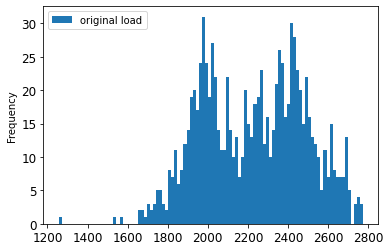

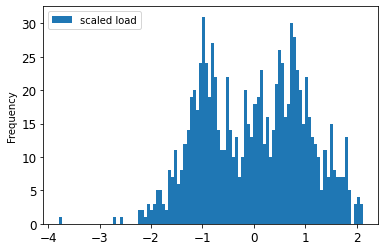

In [19]:
stlf_data[(stlf_data.index >=4993) & (stlf_data.index <=5953)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=4993) & (valid.index <=5953)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [20]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+1'] = valid_shifted['Cons'].shift(-1)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4993,-1.478198,-2.138447,1.675048,-1.658081,0.202852,0.815789,-1.458708,-1.539409,-1.421284,-0.950776,0.449255,-0.129417,-1.472933,-1.571792
4994,-1.571792,-2.024873,1.540510,-1.658081,0.202852,0.815789,-1.255745,-1.348250,-1.553578,-1.060814,0.437548,-0.266546,-1.471926,-1.602990
4995,-1.602990,-1.911299,1.405973,-1.658081,0.202852,0.815789,-1.279164,-1.278029,-1.580814,-1.160204,0.347790,-0.208370,-1.471254,-1.684885
4996,-1.684885,-1.797725,1.271435,-1.513750,0.202852,0.815789,-1.353323,-1.301436,-1.631397,-1.231197,0.281448,-0.266546,-1.473269,-1.755080
4997,-1.755080,-1.684152,1.136898,-1.513750,0.202852,0.815789,-1.470418,-1.449681,-1.526341,-1.532916,0.265838,-0.478472,-1.490399,-1.836975
4998,-1.836975,-1.570578,1.002360,-1.513750,0.202852,0.815789,-1.564093,-1.246819,-1.335683,-1.731695,0.098031,-0.503405,-1.531041,-1.864273
4999,-1.864273,-1.457004,0.867823,-1.513750,0.202852,0.815789,-1.595318,-1.270226,-1.265645,-1.689100,0.074616,-0.594824,-1.580081,-1.864273
5000,-1.864273,-1.343431,0.733286,-1.369419,0.202852,0.815789,-1.677284,-1.344349,-1.288991,-1.770741,0.008274,-0.669621,-1.627105,-1.953968
5001,-1.953968,-1.229857,0.598748,-1.369419,0.202852,0.815789,-1.747540,-1.461385,-1.436848,-1.973070,-0.015141,-0.702865,-1.669090,-2.039762
5002,-2.039762,-1.116283,0.464211,-1.369419,0.202852,0.815789,-1.829506,-1.555014,-1.234517,-2.271240,-0.019043,-0.653000,-1.735931,-2.020264


In [21]:
valid_shifted = valid_shifted.interpolate()

In [22]:
valid_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5944,0.674467,0.071079,0.806670,1.517204,1.223485,-1.225808,0.941719,1.050984,1.679826,0.827591,1.175118,1.275115,0.990785,0.787560
5945,0.787560,0.112378,0.825016,1.517204,1.223485,-1.225808,0.801207,1.093897,1.450258,0.838240,1.358535,1.445487,0.935700,0.877254
5946,0.877254,0.153678,0.843362,1.517204,1.223485,-1.225808,0.652888,0.980763,0.991123,0.916332,1.635612,1.565994,0.927975,1.033244
5947,1.033244,0.194977,0.861708,1.517204,1.223485,-1.225808,0.723144,0.996367,1.181781,0.962477,1.553659,1.528595,0.917227,0.974748
5948,0.974748,0.236277,0.880054,1.661535,1.223485,-1.225808,0.684113,0.949553,1.057269,0.926981,1.424877,1.333291,0.912188,0.807058
5949,0.807058,0.277576,0.898400,1.661535,1.223485,-1.225808,0.797304,0.809110,1.100070,0.784996,1.151703,1.474575,0.889012,1.158036
5950,1.158036,0.318876,0.916746,1.661535,1.223485,-1.225808,0.887076,0.660865,0.987232,1.246448,1.487317,1.798697,0.905806,1.271129
5951,1.271129,0.360175,0.935092,1.661535,1.223485,-1.225808,1.043201,0.731086,1.002796,1.175455,1.491219,1.649102,0.930998,-2.562329
5952,-2.562329,-3.110081,2.138946,-1.658081,0.713168,0.815789,-2.161272,-1.625235,-1.339574,-2.225094,-2.274682,-3.200271,-2.010686,-2.691021
5953,-2.691021,-3.110081,2.138946,-1.658081,0.713168,0.815789,-2.188594,-1.773480,-1.351247,-2.278339,-2.438586,-3.403887,-2.123543,-2.691021


In [23]:
y_valid = valid_shifted[['y_t+1']]
y_valid


,y_t+1
4993,-1.571792
4994,-1.602990
4995,-1.684885
4996,-1.755080
4997,-1.836975
...,...
5949,1.158036
5950,1.271129
5951,-2.562329
5952,-2.691021


In [24]:
X_valid = valid_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4993,-1.478198,-2.138447,1.675048,-1.658081,0.202852,0.815789,-1.458708,-1.539409,-1.421284,-0.950776,0.449255,-0.129417,-1.472933
4994,-1.571792,-2.024873,1.540510,-1.658081,0.202852,0.815789,-1.255745,-1.348250,-1.553578,-1.060814,0.437548,-0.266546,-1.471926
4995,-1.602990,-1.911299,1.405973,-1.658081,0.202852,0.815789,-1.279164,-1.278029,-1.580814,-1.160204,0.347790,-0.208370,-1.471254
4996,-1.684885,-1.797725,1.271435,-1.513750,0.202852,0.815789,-1.353323,-1.301436,-1.631397,-1.231197,0.281448,-0.266546,-1.473269
4997,-1.755080,-1.684152,1.136898,-1.513750,0.202852,0.815789,-1.470418,-1.449681,-1.526341,-1.532916,0.265838,-0.478472,-1.490399
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5949,0.807058,0.277576,0.898400,1.661535,1.223485,-1.225808,0.797304,0.809110,1.100070,0.784996,1.151703,1.474575,0.889012
5950,1.158036,0.318876,0.916746,1.661535,1.223485,-1.225808,0.887076,0.660865,0.987232,1.246448,1.487317,1.798697,0.905806
5951,1.271129,0.360175,0.935092,1.661535,1.223485,-1.225808,1.043201,0.731086,1.002796,1.175455,1.491219,1.649102,0.930998
5952,-2.562329,-3.110081,2.138946,-1.658081,0.713168,0.815789,-2.161272,-1.625235,-1.339574,-2.225094,-2.274682,-3.200271,-2.010686


In [25]:
X_valid=np.atleast_3d(X_valid)

print(X_valid.shape)

(961, 13, 1)


In [26]:
#from keras.layers import RepeatVector
batch_size = 300

model = models.Sequential()

model.add(LSTM(128, input_shape=(1,1)))

model.add(Dropout(0.2))
#model.add(Dropout(0.5))
#model.add(Dropout(0.5))
#model.add(Dropout(0.1))
#model.add(Flatten())

model.add(Dense(1))

In [27]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.005)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [29]:

history = model.fit(X_train,
          y_train,
          batch_size=12,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),callbacks=[earlystop],
          )


Epoch 1/300
417/417 [==============================] - 5s 13ms/step - loss: 0.1828 - val_loss: 0.1352
Epoch 2/300
417/417 [==============================] - 5s 12ms/step - loss: 0.1126 - val_loss: 0.1354
Epoch 3/300
417/417 [==============================] - 5s 11ms/step - loss: 0.0958 - val_loss: 0.1605
Epoch 4/300
417/417 [==============================] - 5s 11ms/step - loss: 0.0774 - val_loss: 0.1082
Epoch 5/300
417/417 [==============================] - 5s 11ms/step - loss: 0.0658 - val_loss: 0.1177
Epoch 6/300
417/417 [==============================] - 5s 11ms/step - loss: 0.0607 - val_loss: 0.0675
Epoch 7/300
417/417 [==============================] - 5s 12ms/step - loss: 0.0579 - val_loss: 0.0812
Epoch 8/300
417/417 [==============================] - 5s 12ms/step - loss: 0.0573 - val_loss: 0.0757
Epoch 9/300
417/417 [==============================] - 5s 13ms/step - loss: 0.0558 - val_loss: 0.0703
Epoch 10/300
417/417 [==============================] - 5s 12ms/step - loss: 0.052

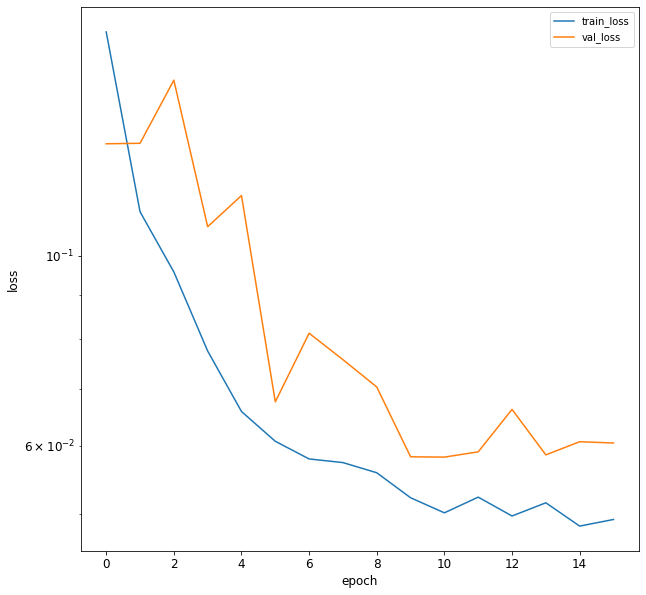

In [30]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [31]:
test = stlf_data.copy()[stlf_data.index >= 5954][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5954,1515.0,12.012452,82.014872,1.0,6.0,1.0,1621.0,1765.0,1863.0,1501.0,1494.0,1266.0,1670.083333
5955,1484.0,11.302452,84.133550,1.0,6.0,1.0,1588.0,1687.0,1837.0,1481.0,1470.0,1251.0,1640.666667
5956,1477.0,11.302452,84.133550,2.0,6.0,1.0,1572.0,1673.0,1808.0,1465.0,1444.0,1210.0,1613.083333
5957,1458.0,11.302452,84.133550,2.0,6.0,1.0,1539.0,1666.0,1770.0,1442.0,1452.0,1230.0,1587.083333
5958,1458.0,11.157452,84.488170,2.0,6.0,1.0,1515.0,1621.0,1765.0,1431.0,1442.0,1247.0,1561.500000
5959,1434.0,11.012452,84.842790,2.0,6.0,1.0,1484.0,1588.0,1687.0,1428.0,1424.0,1237.0,1540.416667
5960,1433.0,11.012452,84.842790,3.0,6.0,1.0,1477.0,1572.0,1673.0,1418.0,1421.0,1243.0,1520.416667
5961,1418.0,11.012452,84.842790,3.0,6.0,1.0,1458.0,1539.0,1666.0,1407.0,1397.0,1244.0,1499.750000
5962,1397.0,11.627452,81.771205,3.0,6.0,1.0,1458.0,1515.0,1621.0,1394.0,1387.0,1226.0,1481.083333
5963,1389.0,12.242452,78.699620,3.0,6.0,1.0,1434.0,1484.0,1588.0,1393.0,1382.0,1226.0,1464.500000


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2974 entries, 5954 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    2974 non-null   float64
 1   Temp    2974 non-null   float64
 2   Hum     2974 non-null   float64
 3   A       2974 non-null   float64
 4   B       2974 non-null   float64
 5   C       2974 non-null   float64
 6   D       2974 non-null   float64
 7   E       2974 non-null   float64
 8   F       2974 non-null   float64
 9   G       2974 non-null   float64
 10  H       2974 non-null   float64
 11  I       2974 non-null   float64
 12  J       2974 non-null   float64
dtypes: float64(13)
memory usage: 325.3 KB


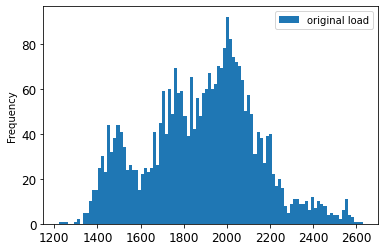

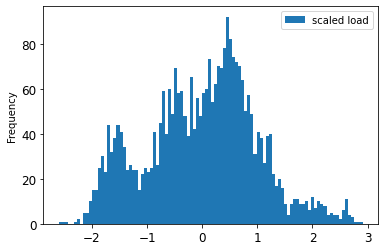

In [33]:
stlf_data[stlf_data.index >= 5954][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[test.index >=5954][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [34]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+1'] = test_shifted['Cons'].shift(-1)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5954,-1.449973,-1.326800,0.787629,-1.663428,0.931966,0.690408,-1.032417,-0.467812,-0.083973,-1.461584,-1.486664,-2.413777,-0.880951,-1.571168
5955,-1.571168,-1.460949,0.899199,-1.663428,0.931966,0.690408,-1.161337,-0.772554,-0.185567,-1.539099,-1.584067,-2.476745,-1.001472,-1.598534
5956,-1.598534,-1.460949,0.899199,-1.518879,0.931966,0.690408,-1.223843,-0.827252,-0.298884,-1.601110,-1.689587,-2.648855,-1.114481,-1.672815
5957,-1.672815,-1.460949,0.899199,-1.518879,0.931966,0.690408,-1.352763,-0.854600,-0.447367,-1.690252,-1.657119,-2.564898,-1.221004,-1.672815
5958,-1.672815,-1.488346,0.917874,-1.518879,0.931966,0.690408,-1.446523,-1.030413,-0.466904,-1.732885,-1.697704,-2.493536,-1.325820,-1.766643
5959,-1.766643,-1.515742,0.936548,-1.518879,0.931966,0.690408,-1.567629,-1.159343,-0.771686,-1.744512,-1.770756,-2.535514,-1.412199,-1.770553
5960,-1.770553,-1.515742,0.936548,-1.374330,0.931966,0.690408,-1.594976,-1.221854,-0.826390,-1.783269,-1.782931,-2.510327,-1.494140,-1.829195
5961,-1.829195,-1.515742,0.936548,-1.374330,0.931966,0.690408,-1.669202,-1.350784,-0.853742,-1.825902,-1.880334,-2.506129,-1.578811,-1.911295
5962,-1.911295,-1.399543,0.774797,-1.374330,0.931966,0.690408,-1.669202,-1.444551,-1.029578,-1.876287,-1.920918,-2.581690,-1.655289,-1.942571
5963,-1.942571,-1.283343,0.613046,-1.374330,0.931966,0.690408,-1.762962,-1.565667,-1.158524,-1.880163,-1.941210,-2.581690,-1.723232,-1.950390


In [35]:
test_shifted = test_shifted.interpolate()
test_shifted.tail(5)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
8923,0.813635,0.282994,-0.429178,1.516643,-1.473994,-1.448419,0.745113,0.766787,1.291451,1.635119,1.979250,1.800820,0.822389,0.735444
8924,0.735444,0.282994,-0.429178,1.661192,-1.473994,-1.448419,0.698233,0.114325,1.232839,1.534350,1.885906,1.813414,0.779370,0.641616
8925,0.641616,0.282994,-0.429178,1.661192,-1.473994,-1.448419,0.834966,0.391719,1.178135,1.433581,1.739802,1.691677,0.732937,0.469598
8926,0.469598,0.220180,-0.429178,1.661192,-1.473994,-1.448419,0.913100,0.602695,1.127338,1.266925,1.476002,1.473391,0.675920,0.489145
8927,0.489145,0.220180,-0.432243,1.661192,-1.473994,-1.448419,0.815433,0.747252,0.767852,1.208789,1.427301,1.385237,0.652021,0.489145


In [36]:
y_test = test_shifted[['y_t+1']]
y_test

,y_t+1
5954,-1.571168
5955,-1.598534
5956,-1.672815
5957,-1.672815
5958,-1.766643
...,...
8923,0.735444
8924,0.641616
8925,0.469598
8926,0.489145


In [37]:
X_test = test_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5954,-1.449973,-1.326800,0.787629,-1.663428,0.931966,0.690408,-1.032417,-0.467812,-0.083973,-1.461584,-1.486664,-2.413777,-0.880951
5955,-1.571168,-1.460949,0.899199,-1.663428,0.931966,0.690408,-1.161337,-0.772554,-0.185567,-1.539099,-1.584067,-2.476745,-1.001472
5956,-1.598534,-1.460949,0.899199,-1.518879,0.931966,0.690408,-1.223843,-0.827252,-0.298884,-1.601110,-1.689587,-2.648855,-1.114481
5957,-1.672815,-1.460949,0.899199,-1.518879,0.931966,0.690408,-1.352763,-0.854600,-0.447367,-1.690252,-1.657119,-2.564898,-1.221004
5958,-1.672815,-1.488346,0.917874,-1.518879,0.931966,0.690408,-1.446523,-1.030413,-0.466904,-1.732885,-1.697704,-2.493536,-1.325820
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,0.813635,0.282994,-0.429178,1.516643,-1.473994,-1.448419,0.745113,0.766787,1.291451,1.635119,1.979250,1.800820,0.822389
8924,0.735444,0.282994,-0.429178,1.661192,-1.473994,-1.448419,0.698233,0.114325,1.232839,1.534350,1.885906,1.813414,0.779370
8925,0.641616,0.282994,-0.429178,1.661192,-1.473994,-1.448419,0.834966,0.391719,1.178135,1.433581,1.739802,1.691677,0.732937
8926,0.469598,0.220180,-0.429178,1.661192,-1.473994,-1.448419,0.913100,0.602695,1.127338,1.266925,1.476002,1.473391,0.675920


In [38]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2974, 13, 1)

In [39]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(2974,13,1)

In [40]:
predictions = model.predict(X_test)
predictions

array([[-1.4900986 ],
       [-1.5772023 ],
       [-1.6371341 ],
       ...,
       [ 0.5514563 ],
       [ 0.37776005],
       [ 0.38503036]], dtype=float32)

In [41]:
feature=stlf_data.copy()[stlf_data.index >= 6900][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    1930.114892
dtype: float64
Cons    257.181043
dtype: float64


In [42]:
load_mean=1930.114892
load_std=257.181043
rescaled_target_load=(y_test*load_std)+load_mean
print(rescaled_target_load.shape)


(2974, 1)


In [43]:
rescaled_predicted_load=(predictions*load_std)+load_mean
print(rescaled_predicted_load.shape)

(2974, 1)


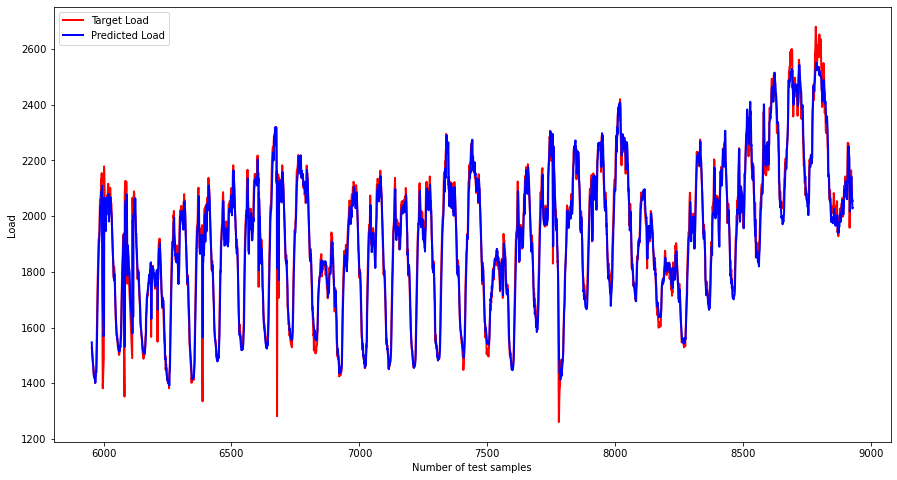

In [44]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [45]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

1.7082979487825483


In [46]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+1    0.381863
dtype: float64


In [47]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

              y_t+1
5954  152502.672547
5955  151799.861006
5956  149889.250967
5957  149890.555433
5958  147476.344631
...             ...
8923  211825.882043
8924  209412.395469
8925  204987.623074
8926  205492.769092
8927  205492.678147

[2974 rows x 1 columns]


In [48]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

           y_t+1
5954  434.696756
5955   30.096850
5956   84.207153
5957  107.936065
5958   40.754961
...          ...
8923   11.032111
8924   26.196292
8925  443.206453
8926  820.603585
8927  716.977111

[2974 rows x 1 columns]
y_t+1    2803.425904
dtype: float64


In [49]:
RMSE=MSE**0.5
print(RMSE)

y_t+1    52.947388
dtype: float64


In [50]:
print(predictions)

[[-1.4900986 ]
 [-1.5772023 ]
 [-1.6371341 ]
 ...
 [ 0.5514563 ]
 [ 0.37776005]
 [ 0.38503036]]


In [51]:
print(rescaled_predicted_load)

[[1546.8898]
 [1524.4883]
 [1509.0751]
 ...
 [2071.939 ]
 [2027.2676]
 [2029.1373]]


In [52]:
a=np.array(rescaled_predicted_load)

In [53]:
for i in  range(0,2974):
    b=a[i]
    print(b)


[1546.8898]
[1524.4883]
[1509.0751]
[1489.5094]
[1482.1517]
[1464.622]
[1460.758]
[1444.4882]
[1428.1714]
[1422.2837]
[1419.0938]
[1416.7788]
[1415.4115]
[1420.0721]
[1401.523]
[1418.356]
[1424.8818]
[1441.1503]
[1439.1727]
[1477.0878]
[1536.4539]
[1594.6311]
[1656.1555]
[1696.2904]
[1744.905]
[1786.4927]
[1826.901]
[1868.8091]
[1900.9064]
[1909.7961]
[1931.5573]
[1947.8334]
[1991.7893]
[2033.2635]
[2031.4208]
[2036.438]
[2034.8652]
[2055.603]
[2087.8933]
[2072.72]
[2109.4448]
[1929.727]
[1772.8816]
[1680.2097]
[1649.3014]
[1621.1772]
[1568.3081]
[1579.4629]
[1575.6436]
[2066.4333]
[2065.5237]
[2022.4362]
[1993.2135]
[1956.3751]
[1945.6295]
[1969.7616]
[2024.5709]
[2003.7412]
[2038.9081]
[2059.6323]
[2067.331]
[2028.502]
[2040.48]
[2040.6812]
[2061.2522]
[2079.113]
[2079.6094]
[1980.4989]
[1997.8138]
[2017.5857]
[2033.1418]
[2048.0645]
[2051.0513]
[2068.266]
[2053.374]
[2029.0983]
[2021.239]
[2010.4601]
[1995.906]
[1964.0955]
[1935.0598]
[1902.8489]
[1876.6406]
[1857.8356]
[1834.7395]


[1982.8658]
[2004.2067]
[2017.4635]
[2020.234]
[2036.3544]
[2075.5757]
[2113.4028]
[2151.1543]
[2178.1477]
[2193.4746]
[2219.6917]
[2229.0188]
[2206.727]
[2200.4243]
[2258.2798]
[2284.1646]
[2251.697]
[2294.2625]
[2299.4004]
[2319.4214]
[2318.9343]
[2306.4429]
[2305.2478]
[2319.0369]
[2307.2812]
[2116.3176]
[2155.5278]
[1812.2556]
[1822.4999]
[2030.6699]
[2058.2961]
[2118.6099]
[2123.3752]
[1770.4935]
[2076.137]
[2101.2017]
[2080.4834]
[2083.4253]
[2063.3613]
[2128.922]
[2110.1953]
[2104.707]
[2070.969]
[2051.0107]
[2049.1895]
[2111.6348]
[2119.0945]
[2158.5713]
[2153.553]
[2119.1519]
[2114.2856]
[2096.629]
[2067.58]
[2036.124]
[2001.6326]
[1973.2156]
[1946.3536]
[1925.9242]
[1882.7838]
[1858.9025]
[1839.3712]
[1833.6433]
[1829.0974]
[1842.1189]
[1820.781]
[1792.4368]
[1764.3193]
[1735.6798]
[1681.3296]
[1662.1393]
[1649.898]
[1629.1913]
[1617.5515]
[1618.2563]
[1600.9404]
[1589.0449]
[1595.8644]
[1585.1929]
[1574.905]
[1566.7806]
[1567.3738]
[1559.779]
[1563.2671]
[1556.3546]
[1557.69

[1504.4777]
[1503.9031]
[1526.2856]
[1547.8438]
[1569.7239]
[1607.8679]
[1657.9421]
[1722.6205]
[1758.9558]
[1800.8514]
[1841.3296]
[1868.7949]
[1879.9269]
[1930.5238]
[1918.3789]
[1918.8475]
[1937.1908]
[1979.4838]
[2035.9401]
[2086.643]
[2097.4587]
[2108.924]
[2137.9685]
[2164.115]
[2136.6694]
[2173.4067]
[2155.6423]
[2191.7432]
[2233.6975]
[2250.1694]
[2256.6782]
[2266.7354]
[2255.9983]
[2274.531]
[2201.9028]
[2193.1096]
[2213.9678]
[2163.353]
[2193.484]
[2180.3677]
[2157.279]
[2171.6553]
[2192.9402]
[2171.0063]
[2147.4897]
[2155.75]
[2141.0635]
[2123.7954]
[2115.293]
[2089.8596]
[2115.3777]
[2131.4902]
[2114.76]
[2098.2527]
[2129.6516]
[2125.3923]
[2080.8213]
[2050.9822]
[2116.6694]
[2132.3652]
[2113.6611]
[2094.2896]
[2080.7283]
[2040.9963]
[2024.4404]
[1990.7916]
[1950.8865]
[1926.9893]
[1892.4167]
[1868.8661]
[1835.5051]
[1820.4346]
[1768.028]
[1794.1349]
[1819.4703]
[1814.0853]
[1800.5636]
[1768.3271]
[1729.6389]
[1699.285]
[1669.381]
[1641.4525]
[1617.2161]
[1614.2959]
[1602.0

[1814.1625]
[1838.465]
[1851.0281]
[1846.4917]
[1823.8608]
[1820.2922]
[1809.934]
[1803.377]
[1800.3207]
[1823.805]
[1824.1641]
[1826.5488]
[1832.0253]
[1811.8356]
[1814.6119]
[1820.0458]
[1807.4973]
[1819.7799]
[1829.6355]
[1815.9781]
[1796.52]
[1805.0641]
[1805.7267]
[1810.1859]
[1805.5502]
[1759.939]
[1752.7054]
[1754.3872]
[1752.4464]
[1739.9955]
[1749.4305]
[1742.6459]
[1748.8198]
[1793.111]
[1815.0425]
[1803.7919]
[1809.483]
[1788.6678]
[1771.7726]
[1792.9729]
[1772.9446]
[1808.2324]
[1861.3867]
[1855.7836]
[1859.3068]
[1873.5494]
[1867.03]
[1850.5676]
[1809.9266]
[1798.2999]
[1787.1212]
[1756.4506]
[1757.9691]
[1734.3623]
[1715.5254]
[1691.519]
[1699.4841]
[1724.7615]
[1736.8643]
[1723.8729]
[1703.8479]
[1671.884]
[1649.1664]
[1621.2344]
[1606.0049]
[1594.4365]
[1579.3773]
[1558.8741]
[1559.9927]
[1557.9934]
[1545.9822]
[1561.5442]
[1557.5095]
[1552.8574]
[1550.8646]
[1549.9312]
[1542.5859]
[1554.538]
[1548.6835]
[1555.8469]
[1562.9333]
[1558.7533]
[1589.0253]
[1626.3448]
[1651.

[2102.5496]
[2084.0784]
[2069.6616]
[2067.0015]
[2060.6821]
[2106.4302]
[2122.1199]
[2199.2063]
[2247.571]
[2228.3533]
[2250.3533]
[2230.2979]
[2219.1943]
[2208.681]
[2120.4177]
[2016.5295]
[2047.907]
[2080.8113]
[2108.9219]
[2102.8496]
[2126.6943]
[2141.879]
[2115.9358]
[2100.2446]
[2071.939]
[2027.2676]
[2029.1373]
